# Project: Investigate a Dataset - [FBI Gun Data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> The data comes from the FBI's National Instant Criminal Background Check System.It contains the number of firearm checks by month, state, and type.


### Question(s) for Analysis
>1- Which state has the max number of total guns?

>2- Which year has the max number of total guns?

>3- Is there a relationship between permit and number of total guns?

>4- Are handguns more sold than long_guns in a particular state, or vice versa?

>5- What is the overall trend of gun purchases?

In [2]:
#import all used packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

<a id='wrangling'></a>
## Data Wrangling
### Data Assessing

> Read the dataset.

> Show the first 5 rows in your dataset.

> Show number of rows and columns in the dataset to know if there is any null values, and know number of rows and columns.

> Know number of rows and columns.

> Show describtion for every column in the dataset.

> Visualization for the entire dataset.

In [3]:
# Load data and print out a few lines.
df_gun_data = pd.read_excel('gun-data.xlsx')
df_gun_data.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [4]:
#show information the dataset
df_gun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

#### There is many columns have null values :(

#### We have month column which has year and month in string format :(

In [5]:
df_gun_data.shape

(12485, 27)

In [6]:
#show describtion for every column in the dataset
df_gun_data.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000



### Data Cleaning
> Drop columns that have large number of null values, like(permit_recheck, other, ...)

> Drop the all rows that have null values.
 
> Convert every float type to int type.

> Rename month column to date column.

> Convert date columns to datetime format.

> Extract year and month from date and put each one in separate column.

> Show the data again.

In [7]:
#Drop columns that have large number of null values.
df_gun_data.drop(['permit_recheck', 'other', 'prepawn_other', 'redemption_other', 'returned_handgun'], axis = 1, inplace = True)
df_gun_data.drop(['returned_long_gun', 'returned_other', 'rentals_handgun', 'rentals_long_gun', 'private_sale_handgun'], axis = 1, inplace = True)
df_gun_data.drop(['private_sale_long_gun', 'private_sale_other', 'return_to_seller_handgun', 'return_to_seller_long_gun', 'return_to_seller_other'], axis = 1, inplace = True)
df_gun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                12485 non-null  object 
 1   state                12485 non-null  object 
 2   permit               12461 non-null  float64
 3   handgun              12465 non-null  float64
 4   long_gun             12466 non-null  float64
 5   multiple             12485 non-null  int64  
 6   admin                12462 non-null  float64
 7   prepawn_handgun      10542 non-null  float64
 8   prepawn_long_gun     10540 non-null  float64
 9   redemption_handgun   10545 non-null  float64
 10  redemption_long_gun  10544 non-null  float64
 11  totals               12485 non-null  int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 1.1+ MB


In [8]:
#Drop all rows that have null values.
df_gun_data = df_gun_data.dropna()
df_gun_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10530 entries, 0 to 10559
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                10530 non-null  object 
 1   state                10530 non-null  object 
 2   permit               10530 non-null  float64
 3   handgun              10530 non-null  float64
 4   long_gun             10530 non-null  float64
 5   multiple             10530 non-null  int64  
 6   admin                10530 non-null  float64
 7   prepawn_handgun      10530 non-null  float64
 8   prepawn_long_gun     10530 non-null  float64
 9   redemption_handgun   10530 non-null  float64
 10  redemption_long_gun  10530 non-null  float64
 11  totals               10530 non-null  int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 1.0+ MB


In [9]:
#Convert every float to int.
df_gun_data = df_gun_data.astype({"permit":'int', "handgun":'int', "long_gun":'int', "admin":'int', "prepawn_handgun":'int', "prepawn_long_gun":'int', "redemption_handgun":'int', "redemption_long_gun":'int'})
df_gun_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10530 entries, 0 to 10559
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   month                10530 non-null  object
 1   state                10530 non-null  object
 2   permit               10530 non-null  int32 
 3   handgun              10530 non-null  int32 
 4   long_gun             10530 non-null  int32 
 5   multiple             10530 non-null  int64 
 6   admin                10530 non-null  int32 
 7   prepawn_handgun      10530 non-null  int32 
 8   prepawn_long_gun     10530 non-null  int32 
 9   redemption_handgun   10530 non-null  int32 
 10  redemption_long_gun  10530 non-null  int32 
 11  totals               10530 non-null  int64 
dtypes: int32(8), int64(2), object(2)
memory usage: 740.4+ KB


#### Now there is no null values in our dataset :)

In [10]:
#Rename 'month' column to date column
df_gun_data = df_gun_data.rename(columns = {'month' : 'date'})
df_gun_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10530 entries, 0 to 10559
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   date                 10530 non-null  object
 1   state                10530 non-null  object
 2   permit               10530 non-null  int32 
 3   handgun              10530 non-null  int32 
 4   long_gun             10530 non-null  int32 
 5   multiple             10530 non-null  int64 
 6   admin                10530 non-null  int32 
 7   prepawn_handgun      10530 non-null  int32 
 8   prepawn_long_gun     10530 non-null  int32 
 9   redemption_handgun   10530 non-null  int32 
 10  redemption_long_gun  10530 non-null  int32 
 11  totals               10530 non-null  int64 
dtypes: int32(8), int64(2), object(2)
memory usage: 740.4+ KB


##### Now there is no 'month column, it became 'date'.

In [11]:
# convert the 'date' column to datetime format
df_gun_data['date']= pd.to_datetime(df_gun_data['date'])
df_gun_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10530 entries, 0 to 10559
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 10530 non-null  datetime64[ns]
 1   state                10530 non-null  object        
 2   permit               10530 non-null  int32         
 3   handgun              10530 non-null  int32         
 4   long_gun             10530 non-null  int32         
 5   multiple             10530 non-null  int64         
 6   admin                10530 non-null  int32         
 7   prepawn_handgun      10530 non-null  int32         
 8   prepawn_long_gun     10530 non-null  int32         
 9   redemption_handgun   10530 non-null  int32         
 10  redemption_long_gun  10530 non-null  int32         
 11  totals               10530 non-null  int64         
dtypes: datetime64[ns](1), int32(8), int64(2), object(1)
memory usage: 740.4+ KB


#### 'Date' is no longer in string format, it became in datetime format.

In [12]:
#extract 'year' and 'month' from date and put each one in separate column
df_gun_data['year']= pd.DatetimeIndex(df_gun_data['date']).year
df_gun_data['month']= pd.DatetimeIndex(df_gun_data['date']).month
df_gun_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10530 entries, 0 to 10559
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 10530 non-null  datetime64[ns]
 1   state                10530 non-null  object        
 2   permit               10530 non-null  int32         
 3   handgun              10530 non-null  int32         
 4   long_gun             10530 non-null  int32         
 5   multiple             10530 non-null  int64         
 6   admin                10530 non-null  int32         
 7   prepawn_handgun      10530 non-null  int32         
 8   prepawn_long_gun     10530 non-null  int32         
 9   redemption_handgun   10530 non-null  int32         
 10  redemption_long_gun  10530 non-null  int32         
 11  totals               10530 non-null  int64         
 12  year                 10530 non-null  int64         
 13  month                10530 non-

##### Now we have 2 more columns, 'year' and 'month'.

In [13]:
#show the data again
df_gun_data.head()

,date,state,permit,handgun,long_gun,multiple,admin,prepawn_handgun,prepawn_long_gun,redemption_handgun,redemption_long_gun,totals,year,month
0,2017-09-01,Alabama,16717,5734,6320,317,0,15,21,1378,1262,32019,2017,9
1,2017-09-01,Alaska,209,2320,2930,160,0,5,2,200,154,6303,2017,9
2,2017-09-01,Arizona,5069,11063,7946,631,0,13,6,1474,748,28394,2017,9
3,2017-09-01,Arkansas,2935,4347,6063,366,51,12,13,1296,1824,17747,2017,9
4,2017-09-01,California,57839,37165,24581,0,0,0,0,535,397,123506,2017,9


In [14]:
#show the last 5 rows.
df_gun_data.tail()

,date,state,permit,handgun,long_gun,multiple,admin,prepawn_handgun,prepawn_long_gun,redemption_handgun,redemption_long_gun,totals,year,month
10555,2001-10-01,Virginia,0,8322,14465,266,1,0,0,0,0,23054,2001,10
10556,2001-10-01,Washington,4372,4908,10897,220,36,4,3,34,67,20541,2001,10
10557,2001-10-01,West Virginia,0,3872,13387,216,0,5,15,25,129,17649,2001,10
10558,2001-10-01,Wisconsin,0,4952,20458,4,0,0,0,0,9,25423,2001,10
10559,2001-10-01,Wyoming,157,840,2260,57,0,1,4,7,14,3340,2001,10


In [15]:
df_gun_data.describe()

,permit,handgun,long_gun,multiple,admin,prepawn_handgun,prepawn_long_gun,redemption_handgun,redemption_long_gun,totals,year,month
count,10530.000000,10530.000000,10530.000000,10530.000000,10530.000000,10530.000000,10530.000000,10530.000000,10530.000000,10530.000000,10530.000000,10530.000000
mean,7269.029630,6410.507407,7942.553086,291.888604,36.320513,4.833048,7.841026,408.484425,600.003134,23297.853466,2009.264482,6.497341
std,25682.065872,9066.756639,9428.874985,845.494220,442.101356,10.912853,16.474243,783.878283,952.518404,34685.810276,4.628290,3.452325
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2001.000000,1.000000
25%,0.000000,1030.250000,2221.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5159.000000,2005.000000,3.000000
50%,744.500000,3398.500000,5187.000000,139.000000,0.000000,0.000000,1.000000,40.000000,176.000000,13282.500000,2009.000000,6.000000
75%,5129.500000,7986.500000,10553.500000,329.000000,0.000000,5.000000,8.000000,562.000000,872.750000,27501.500000,2013.000000,9.000000
max,522188.000000,107224.000000,108058.000000,38907.000000,28083.000000,164.000000,269.000000,10046.000000,8831.000000,541978.000000,2017.000000,12.000000


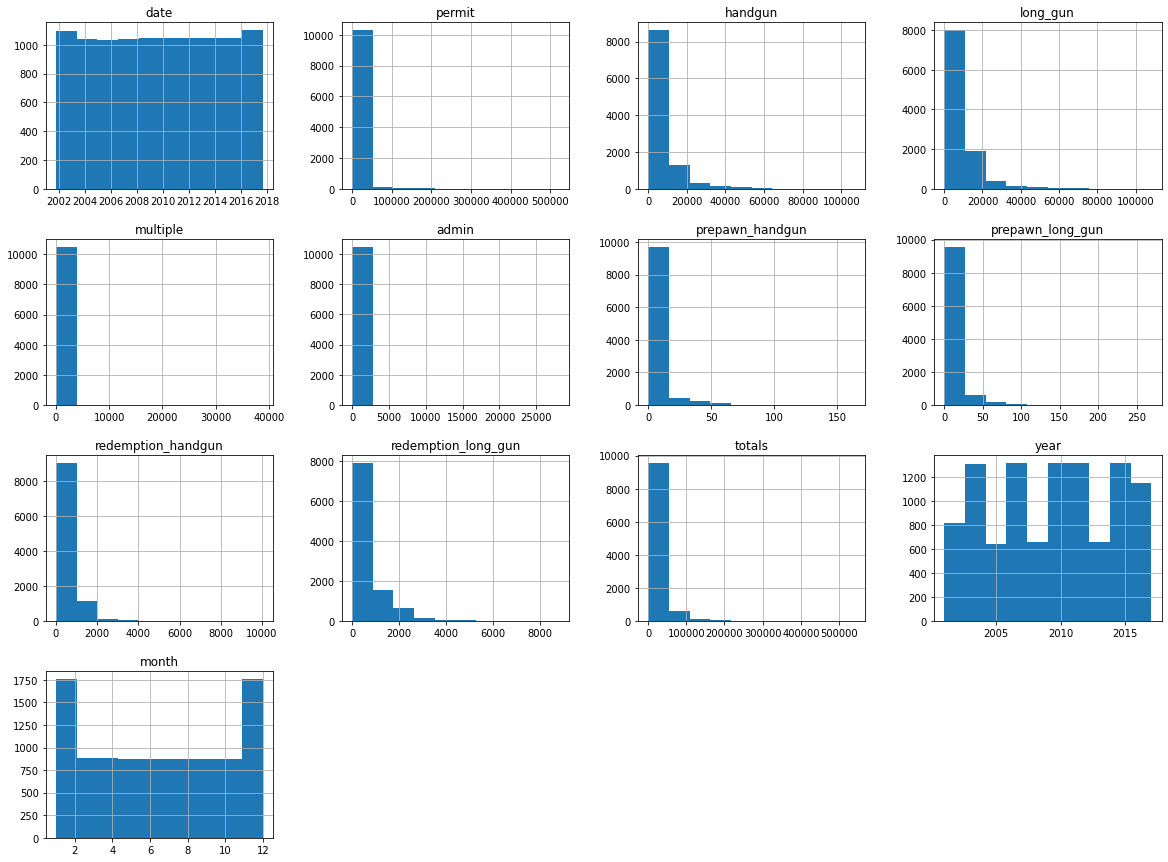

In [16]:
df_gun_data.hist(figsize=(20,15));

<a id='eda'></a>
## Exploratory Data Analysis

## Now we will investigate our dataset ♥♥


### Research Question 1 (Which state has the max number of total guns?!)

In [17]:
# We first see all states with total number of guns in each one
state_total = df_gun_data.groupby(['state'], as_index=False)['totals'].mean()
state_total

,state,totals
0,Alabama,31543.036458
1,Alaska,5328.588542
2,Arizona,20746.338542
3,Arkansas,17040.239583
4,California,86748.661458
5,Colorado,27346.424084
6,Connecticut,15276.994764
7,Delaware,2325.567708
8,District of Columbia,29.057592
9,Florida,56881.635417


In [18]:
# What state has the largest number of guns?
state_total.loc[state_total['totals'].idxmax()]

state          Kentucky
totals    151560.640625
Name: 18, dtype: object

#### Well.. Kentucky is the state that has the largest number of guns :(

In [19]:
#All guns except Kentucky's guns
state_total.totals.sum() - 151560.640625

1127774.3581177695

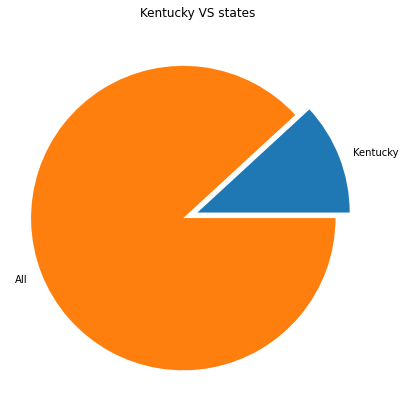

In [20]:
#Now.. show Kentucky VS all states with pie chart
state = ['Kentucky', 'All']
data = [151560.640625, 1127774.3581177695]
explode = (0, 0.1)
fig = plt.figure(figsize =(10, 7))
plt.title('Kentucky VS states')
plt.pie(data, labels = state, explode=explode)
# show plot
plt.show()

### Research Question 2  (Which year has the max number of total guns?)

In [21]:
#show all years with total number of guns in each one
year_total = df_gun_data.groupby(['year'], as_index=False)['totals'].mean()
year_total

,year,totals
0,2001,18625.536585
1,2002,12734.425076
2,2003,12749.990895
3,2004,12987.289634
4,2005,13698.339535
5,2006,15153.156773
6,2007,16912.533333
7,2008,19231.795455
8,2009,21189.322727
9,2010,21697.710606


In [22]:
#now we will know wich year has the max number of total guns.
year_total.loc[year_total['totals'].idxmax()]

year       2016.000000
totals    41553.806061
Name: 15, dtype: float64

##### So 2016 is the year that has the max number of total guns.

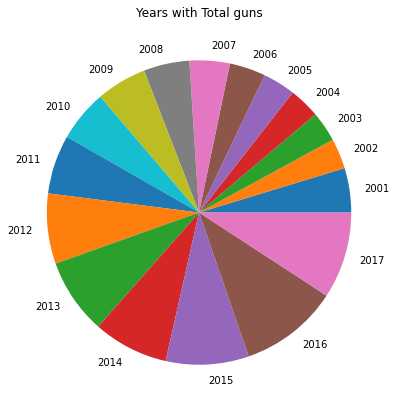

In [23]:
#Visualization for all years
fig = plt.figure(figsize =(10, 7))
plt.pie(year_total.totals, labels = year_total.year)
plt.title('Years with Total guns')
# show plot
plt.show()

### Research Question 3  (Is there a relationship between permit and number of total guns?)

In [24]:
#First we will see if there is a relationship between permit and handgun
#groupby permit to see handgun
permit_handgun = df_gun_data.groupby(['permit'], as_index=False)['handgun'].mean()
permit_handgun

,permit,handgun
0,0,4334.495710
1,1,8708.521739
2,2,7444.833333
3,3,6703.538462
4,4,6271.538462
...,...,...
5013,374078,8690.000000
5014,374603,7236.000000
5015,376016,8039.000000
5016,378384,8112.000000


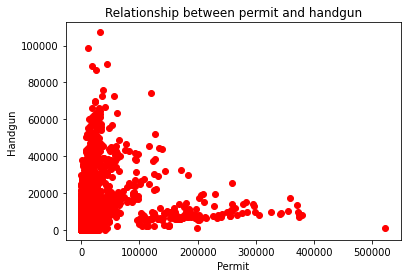

In [25]:
#visualization to se the relationship between permit and handgun
plt.scatter(permit_handgun.permit, permit_handgun.handgun, color='red')
plt.title('Relationship between permit and handgun')
plt.xlabel('Permit')
plt.ylabel('Handgun')
plt.show()

##### Seems that there's no relation except that many handguns appear to be with low permit.

In [26]:
#Permit and totals
#groupby permit to see totals
permit_totals = df_gun_data.groupby(['permit'], as_index=False)['totals'].mean()
permit_totals

,permit,totals
0,0,10732.920565
1,1,18136.391304
2,2,16457.791667
3,3,16271.615385
4,4,16031.384615
...,...,...
5013,374078,391740.000000
5014,374603,390494.000000
5015,376016,394718.000000
5016,378384,398706.000000


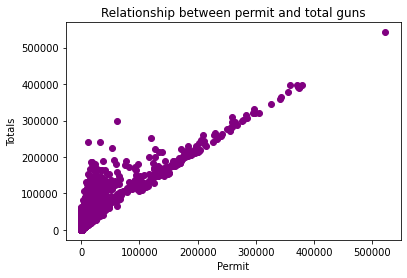

In [27]:
#visualization to se the relationship between permit and totals
plt.scatter(permit_totals.permit, permit_totals.totals, color='purple')
plt.title('Relationship between permit and total guns')
plt.xlabel('Permit')
plt.ylabel('Totals')
plt.show()

##### We find that there's strong positive correlation between the two (permit and totals)

### Research Question 4  (Are handguns more sold than long_guns in a particular state, or vice versa?)

In [28]:
#groupby state to see handgun and long_gun in each state
state_gun = df_gun_data.groupby(['state'])['handgun','long_gun'].sum()
state_gun

C:\Users\Kawther Ahmed\AppData\Local\Temp\ipykernel_10992\3298208216.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  state_gun = df_gun_data.groupby(['state'])['handgun','long_gun'].sum()


,handgun,long_gun
state,,
Alabama,1972163,2235189
Alaska,396795,498076
Arizona,1584849,1291157
Arkansas,836704,1334903
California,4980426,4953318
Colorado,2201672,2243727
Connecticut,851219,607529
Delaware,193092,212861
District of Columbia,4525,599


In [29]:
#create function that takes the state as input and return a bar chart
def state_guns(state):
    ''' We want to know which kind of guns sold most in specific state
        input: State name
        output: bar chart with the two kinds of guns
    '''
    locations = [1, 2]
    labels = ['HandGun', 'LongGun']
    plt.title(state)
    heights = [state_gun.handgun[state], state_gun.long_gun[state]]
    plt.bar(locations, heights, color ='maroon', tick_label=labels)

##### Now we can put the state name and see which kind of guns sold most

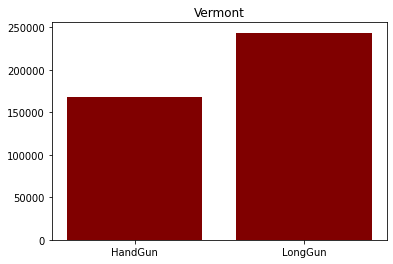

In [30]:
state_guns('Vermont')

##### We see that in 'Vermont' long_gun is more sold than handgun.

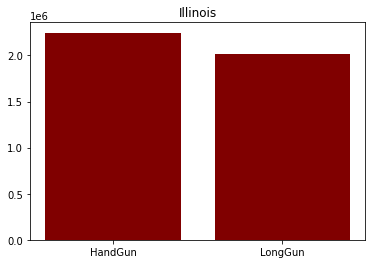

In [31]:
state_guns('Illinois')

##### We see that in 'Vermont' handgun is more sold than long_gun.

### Research Question 5  (What is the overall trend of gun purchases?)

In [32]:
#Show all colums to extract gun columns from them
column_list = list(df_gun_data.columns)
column_list

['date',
 'state',
 'permit',
 'handgun',
 'long_gun',
 'multiple',
 'admin',
 'prepawn_handgun',
 'prepawn_long_gun',
 'redemption_handgun',
 'redemption_long_gun',
 'totals',
 'year',
 'month']

In [33]:
#Extract gun columns from all columns
gun_list = list(filter(lambda c: 'gun' in c, column_list))
gun_list

['handgun',
 'long_gun',
 'prepawn_handgun',
 'prepawn_long_gun',
 'redemption_handgun',
 'redemption_long_gun']

<BarContainer object of 6 artists>

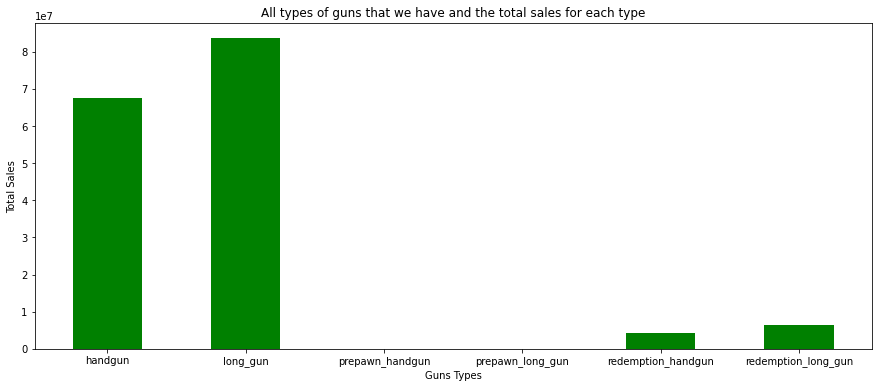

In [34]:
#Visualization for all kindes of guns
locations = [1, 2, 3, 4, 5, 6]
labels = gun_list
heights = df_gun_data[gun_list].sum()
plt.figure (figsize=(15, 6))
plt.title('All types of guns that we have and the total sales for each type')
plt.xlabel('Guns Types')
plt.ylabel('Total Sales')
plt.bar(locations, heights, color ='green', tick_label=labels, width = .5)

##### We fined that long_gun is the most sold gun then handgun.

<a id='conclusions'></a>
## Conclusions
### Result: Our data Shows that...
>1- We assessed the dataset and cleaned it.

>2- Then we started our analysis.

>3- We found that Kentucky is the state that had the max number of total guns.

>4- We found that 2016 is the year that had the max number of total guns.

>5- We saw the relationship between permit and total number of guns.

>6- We can know which kind of guns has more number of sales in a specific state.

>7- We saw overall trend of gun purchases.

### Limitations :(
>1- The dataset is old.

>2- There are many columns that have null or missing values.

>3- We found the total number of guns but couldn't find which kind of people buy these guns.

>4- We couldn't find a percentage of people that has guns in a particular city.

>5- We were unable to link this data with other data in the csv file :(.

In [46]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1